In [1]:
!pip install plotnine

In [2]:
import pandas as pd
import ast
from collections import defaultdict
from plotnine import *

In [3]:
df = pd.read_csv('C:\\Projects Shata\\Bechdel-Test\\bechdel-crew\\credits.csv')
df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [5]:
count1, count2 = 0, 0
for index, row in df.iterrows():
    cast_list = ast.literal_eval(row['cast'])
    crew_list = ast.literal_eval(row['crew'])
    if len(cast_list) == 0:
        count1 += 1
    if len(crew_list) == 0:
        count2 += 1
print('Empty cast percentage:', str('{:.2f}'.format(count1/len(df) * 100))+'%')
print('Empty crew percentage:', str('{:.2f}'.format(count2/len(df) * 100))+'%')

Empty cast percentage: 5.32%
Empty crew percentage: 1.70%


In [6]:
df = df[(df['cast'] != '[]') & (df['crew'] != '[]')].reset_index(drop=True)
df

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
42703,"[{'cast_id': 1, 'character': 'Sir Robert Hode'...","[{'credit_id': '52fe44439251416c9100a899', 'de...",30840
42704,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
42705,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
42706,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758


In [8]:
#COUNTING

df_new = pd.DataFrame(columns=[
    'id', 
    'cast_total_num', 
    'cast_female_num', 
    'cast_male_num', 
    'cast_unknown_num',
    'crew_total_num', 
    'crew_female_num', 
    'crew_male_num',
    'crew_unknown_num',
    'Directing_total', 
    'Directing_female',
    'Directing_male',
    'Directing_unknown',
    'Writing_total',
    'Writing_female',
    'Writing_male',
    'Writing_unknown',
    'Production_total',
    'Production_female',
    'Production_male',
    'Production_unknown',
    ])
df_new['id'] = df['id']
df_new.head()

,id,cast_total_num,cast_female_num,cast_male_num,cast_unknown_num,crew_total_num,crew_female_num,crew_male_num,crew_unknown_num,Directing_total,...,Directing_male,Directing_unknown,Writing_total,Writing_female,Writing_male,Writing_unknown,Production_total,Production_female,Production_male,Production_unknown
0,862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
overview_info = defaultdict(int)
cutoff = 20

for index, row in df[:cutoff].iterrows():
# for index, row in df.iterrows():
    cast_info, crew_info, crew_department = defaultdict(int), defaultdict(int), defaultdict(int)
    cast_list = ast.literal_eval(row['cast'])
    crew_list = ast.literal_eval(row['crew'])

    # count everything in cast
    for cast in cast_list:
        if cast['gender'] == 2:
            cast_info['male'] += 1
        elif cast['gender'] == 1:
            cast_info['female'] += 1
        elif cast['gender'] == 0:
            cast_info['unknown'] += 1
        else:
            print(f'Oops1 index{index} is unusal: {cast}')
    df_new.at[index, 'cast_total_num'] = len(cast_list)
    df_new.at[index, 'cast_female_num'] = cast_info['female']
    df_new.at[index, 'cast_male_num'] = cast_info['male']
    df_new.at[index, 'cast_unknown_num'] = cast_info['unknown']

    # count evetything in crew
    for crew in crew_list:
        if crew['gender'] == 2:
            crew_info['male'] += 1
            crew_department[str(crew['department'])+'_male'] += 1
            crew_department[str(crew['department'])+'_total'] += 1
        elif crew['gender'] == 1:
            crew_info['female'] += 1
            crew_department[str(crew['department'])+'_female'] += 1
            crew_department[str(crew['department'])+'_total'] += 1
        elif crew['gender'] == 0:
            crew_info['unknown'] += 1
            crew_department[str(crew['department'])+'_unknown'] += 1
            crew_department[str(crew['department'])+'_total'] += 1
        else:
            print(f'Oops2 index{index} is unusal: {crew}')
    df_new.at[index, 'crew_total_num'] = len(crew_list)
    df_new.at[index, 'crew_female_num'] = crew_info['female']
    df_new.at[index, 'crew_male_num'] = crew_info['male']
    df_new.at[index, 'crew_unknown_num'] = crew_info['unknown']

    # aggregate all counts to overview data
    overview_info['cast_total'] += len(cast_list)
    for cast_gender, count in cast_info.items():
        overview_info['cast_'+str(cast_gender)] += count
    overview_info['crew_total'] += len(crew_list)
    for crew_gender, count in crew_info.items():
        overview_info['crew_'+str(crew_gender)] += count
    for department, count in crew_department.items():
        overview_info[department] += count
        df_new.at[index, department] = count

df_new.head()

,id,cast_total_num,cast_female_num,cast_male_num,cast_unknown_num,crew_total_num,crew_female_num,crew_male_num,crew_unknown_num,Directing_total,...,Sound_female,Camera_male,Camera_total,Art_female,Costume & Make-Up_female,Costume & Make-Up_total,Costume & Make-Up_unknown,Costume & Make-Up_male,Camera_unknown,Editing_female
0,862,13,3,9,1,106,4,29,73,3,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8844,26,6,9,11,16,0,14,2,1,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15602,7,3,4,0,4,0,4,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31357,10,4,6,0,10,1,3,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11862,12,5,6,1,7,2,5,0,1,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_new.iloc[0]

id                            862
cast_total_num                 13
cast_female_num                 3
cast_male_num                   9
cast_unknown_num                1
crew_total_num                106
crew_female_num                 4
crew_male_num                  29
crew_unknown_num               73
Directing_total                 3
Directing_female              NaN
Directing_male                  1
Directing_unknown               2
Writing_total                   8
Writing_female                NaN
Writing_male                    6
Writing_unknown                 2
Production_total                9
Production_female               2
Production_male                 2
Production_unknown              5
Editing_male                  2.0
Editing_total                11.0
Art_male                      1.0
Art_total                     7.0
Sound_unknown                 8.0
Sound_total                  16.0
Visual Effects_unknown       36.0
Visual Effects_total         44.0
Sound_male    

In [11]:
df_new = df_new.fillna(0) # replace all the NaN with 0
df_new.head()

,id,cast_total_num,cast_female_num,cast_male_num,cast_unknown_num,crew_total_num,crew_female_num,crew_male_num,crew_unknown_num,Directing_total,...,Sound_female,Camera_male,Camera_total,Art_female,Costume & Make-Up_female,Costume & Make-Up_total,Costume & Make-Up_unknown,Costume & Make-Up_male,Camera_unknown,Editing_female
0,862,13,3,9,1,106,4,29,73,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8844,26,6,9,11,16,0,14,2,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15602,7,3,4,0,4,0,4,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31357,10,4,6,0,10,1,3,6,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11862,12,5,6,1,7,2,5,0,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# TOO MANY UNKNOWNS

overview_info

defaultdict(int,
            {'cast_total': 446,
             'cast_male': 240,
             'cast_female': 122,
             'cast_unknown': 84,
             'crew_total': 540,
             'crew_male': 222,
             'crew_unknown': 266,
             'crew_female': 52,
             'Directing_male': 23,
             'Directing_total': 33,
             'Writing_male': 41,
             'Writing_total': 57,
             'Writing_unknown': 9,
             'Production_female': 21,
             'Production_total': 101,
             'Production_unknown': 31,
             'Production_male': 49,
             'Editing_male': 17,
             'Editing_total': 48,
             'Art_male': 15,
             'Art_total': 47,
             'Sound_unknown': 43,
             'Sound_total': 76,
             'Visual Effects_unknown': 46,
             'Visual Effects_total': 54,
             'Sound_male': 31,
             'Editing_unknown': 28,
             'Crew_unknown': 32,
             'Crew_total'

In [13]:
print('Percentage of unknowns in Cast:', overview_info['cast_unknown']/overview_info['cast_total'])
print('Percentage of unknowns in Crew:', overview_info['crew_unknown']/overview_info['crew_total'])
print('Percentage of unknowns in Directing:', overview_info['Directing_unknown']/overview_info['Directing_total'])
print('Percentage of unknowns in Writing:', overview_info['Writing_unknown']/overview_info['Writing_total'])
print('Percentage of unknowns in Production:', overview_info['Production_unknown']/overview_info['Production_total'])

Percentage of unknowns in Cast: 0.18834080717488788
Percentage of unknowns in Crew: 0.4925925925925926
Percentage of unknowns in Directing: 0.21212121212121213
Percentage of unknowns in Writing: 0.15789473684210525
Percentage of unknowns in Production: 0.3069306930693069


In [16]:
# GENDER PREDICTION FROM FIRST NAMES

!pip install gender-guesser

   ---------------------------------------- 0.0/379.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/379.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/379.3 kB ? eta -:--:--
   --- ----------------------------------- 30.7/379.3 kB 330.3 kB/s eta 0:00:02
   ------ -------------------------------- 61.4/379.3 kB 409.6 kB/s eta 0:00:01
   ---------------- --------------------- 163.8/379.3 kB 893.0 kB/s eta 0:00:01
   --------------------------------- ------ 317.4/379.3 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 379.3/379.3 kB 1.5 MB/s eta 0:00:00


In [17]:
import gender_guesser.detector as gender
d = gender.Detector()

In [18]:

df_new = pd.DataFrame(columns=[
    'id', 
    'cast_total_num', 
    'cast_female_num', 
    'cast_male_num', 
    'cast_unknown_num',
    'crew_total_num', 
    'crew_female_num', 
    'crew_male_num',
    'crew_unknown_num',
    'Directing_total', 
    'Directing_female',
    'Directing_male',
    'Directing_unknown',
    'Writing_total',
    'Writing_female',
    'Writing_male',
    'Writing_unknown',
    'Production_total',
    'Production_female',
    'Production_male',
    'Production_unknown',
    ])
df_new['id'] = df['id']
df_new.head()

,id,cast_total_num,cast_female_num,cast_male_num,cast_unknown_num,crew_total_num,crew_female_num,crew_male_num,crew_unknown_num,Directing_total,...,Directing_male,Directing_unknown,Writing_total,Writing_female,Writing_male,Writing_unknown,Production_total,Production_female,Production_male,Production_unknown
0,862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
overview_info = defaultdict(int)

# for index, row in df[:cutoff].iterrows():
for index, row in df.iterrows():
    cast_info, crew_info, crew_department = defaultdict(int), defaultdict(int), defaultdict(int)
    cast_list = ast.literal_eval(row['cast'])
    crew_list = ast.literal_eval(row['crew'])

    # count everything in cast
    for cast in cast_list:
        if cast['gender'] == 2: # male
            cast_info['male'] += 1
        elif cast['gender'] == 1: # female
            cast_info['female'] += 1
        elif cast['gender'] == 0: # unknown gender so we predict from first name
            first_name = cast['name'].split(' ')[0]
            predicted_gender = d.get_gender(first_name)
            if predicted_gender == 'male' or predicted_gender == 'mostly_male':
                cast_info['male'] += 1
            elif predicted_gender == 'female' or predicted_gender == 'mostly_female':
                cast_info['female'] += 1
            elif predicted_gender == 'unknown' or predicted_gender == 'andy':
                cast_info['unknown'] += 1
        else:
            print(f'Oops1 index{index} is unusal: {cast}')
    df_new.at[index, 'cast_total_num'] = len(cast_list)
    df_new.at[index, 'cast_female_num'] = cast_info['female']
    df_new.at[index, 'cast_male_num'] = cast_info['male']
    df_new.at[index, 'cast_unknown_num'] = cast_info['unknown']

    # count evetything in crew
    for crew in crew_list:
        if crew['gender'] == 2:
            crew_info['male'] += 1
            crew_department[str(crew['department'])+'_male'] += 1
            crew_department[str(crew['department'])+'_total'] += 1
        elif crew['gender'] == 1:
            crew_info['female'] += 1
            crew_department[str(crew['department'])+'_female'] += 1
            crew_department[str(crew['department'])+'_total'] += 1
        elif crew['gender'] == 0:
            first_name = crew['name'].split(' ')[0]
            predicted_gender = d.get_gender(first_name)
            if predicted_gender == 'male' or predicted_gender == 'mostly_male':
                crew_info['male'] += 1
                crew_department[str(crew['department'])+'_male'] += 1
            elif predicted_gender == 'female' or predicted_gender == 'mostly_female':
                crew_info['female'] += 1
                crew_department[str(crew['department'])+'_female'] += 1
            elif predicted_gender == 'unknown' or predicted_gender == 'andy':
                crew_info['unknown'] += 1
                crew_department[str(crew['department'])+'_unknown'] += 1
            crew_department[str(crew['department'])+'_total'] += 1
        else:
            print(f'Oops2 index{index} is unusal: {crew}')
    df_new.at[index, 'crew_total_num'] = len(crew_list)
    df_new.at[index, 'crew_female_num'] = crew_info['female']
    df_new.at[index, 'crew_male_num'] = crew_info['male']
    df_new.at[index, 'crew_unknown_num'] = crew_info['unknown']

    # aggregate all counts to overview data
    overview_info['cast_total'] += len(cast_list)
    for cast_gender, count in cast_info.items():
        overview_info['cast_'+str(cast_gender)] += count
    overview_info['crew_total'] += len(crew_list)
    for crew_gender, count in crew_info.items():
        overview_info['crew_'+str(crew_gender)] += count
    for department, count in crew_department.items():
        overview_info[department] += count
        df_new.at[index, department] = count
``
df_new.head()

,id,cast_total_num,cast_female_num,cast_male_num,cast_unknown_num,crew_total_num,crew_female_num,crew_male_num,crew_unknown_num,Directing_total,...,Lighting_male,Camera_female,Costume & Make-Up_unknown,Crew_unknown,Camera_unknown,Editing_unknown,Actors_female,Actors_total,Actors_male,Actors_unknown
0,862,13,3,10,0,106,27,73,6,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8844,26,12,14,0,16,2,14,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15602,7,3,4,0,4,0,4,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31357,10,4,6,0,10,2,8,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11862,12,5,7,0,7,2,5,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
print('Percentage of unknowns in Cast:', overview_info['cast_unknown']/overview_info['cast_total'])
print('Percentage of unknowns in Crew:', overview_info['crew_unknown']/overview_info['crew_total'])
print('Percentage of unknowns in Directing:', overview_info['Directing_unknown']/overview_info['Directing_total'])
print('Percentage of unknowns in Writing:', overview_info['Writing_unknown']/overview_info['Writing_total'])
print('Percentage of unknowns in Production:', overview_info['Production_unknown']/overview_info['Production_total'])

Percentage of unknowns in Cast: 0.05656110211390698
Percentage of unknowns in Crew: 0.060861390620103754
Percentage of unknowns in Directing: 0.05336826615942289
Percentage of unknowns in Writing: 0.06618986573105728
Percentage of unknowns in Production: 0.05394438350036744


In [ ]:
# The percentage of unknown is reduced significantly 

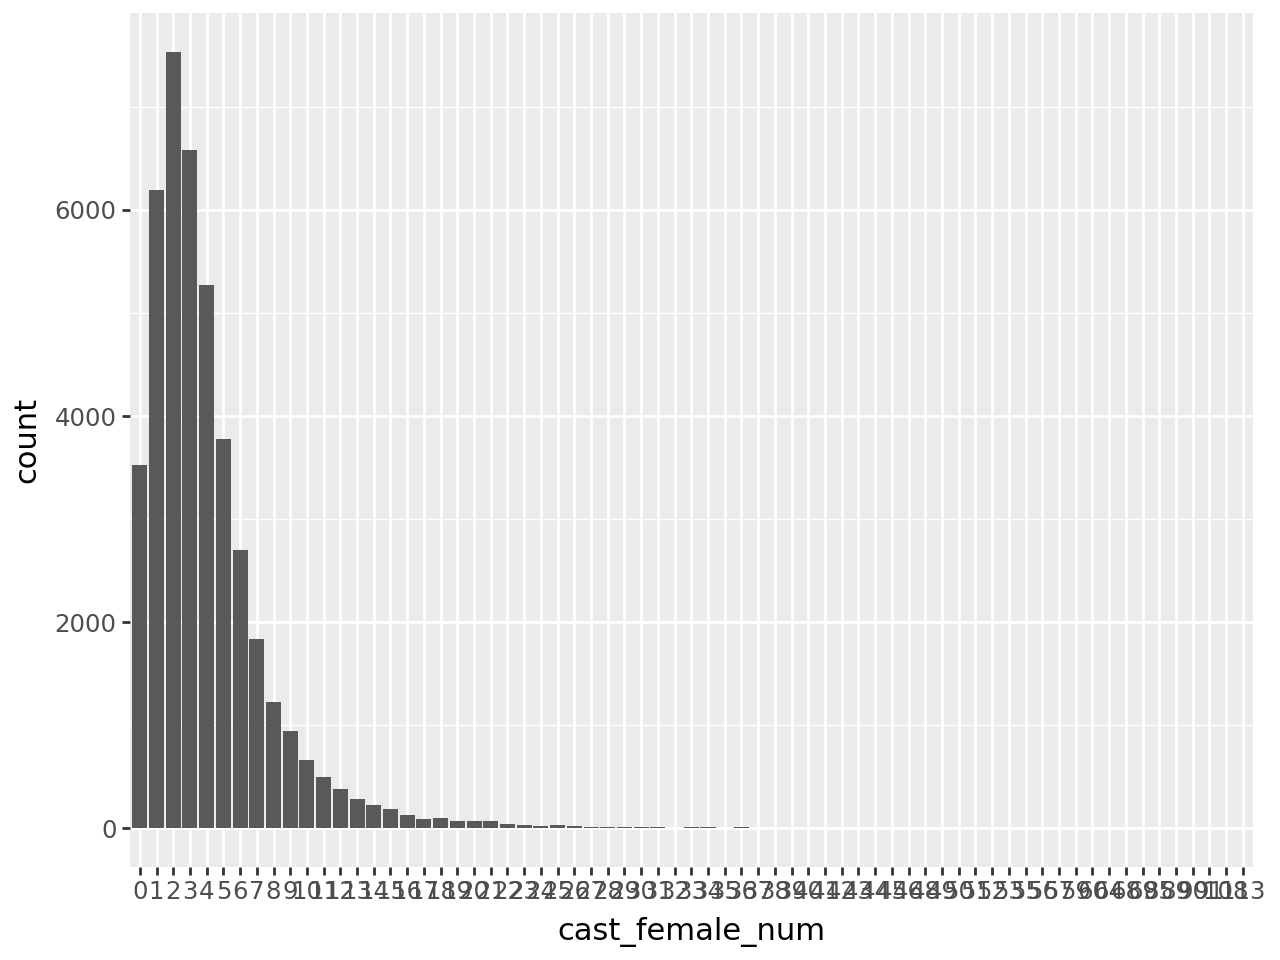

In [21]:
(ggplot(df_new,
        aes(x="cast_female_num")) + 
    geom_bar()
)

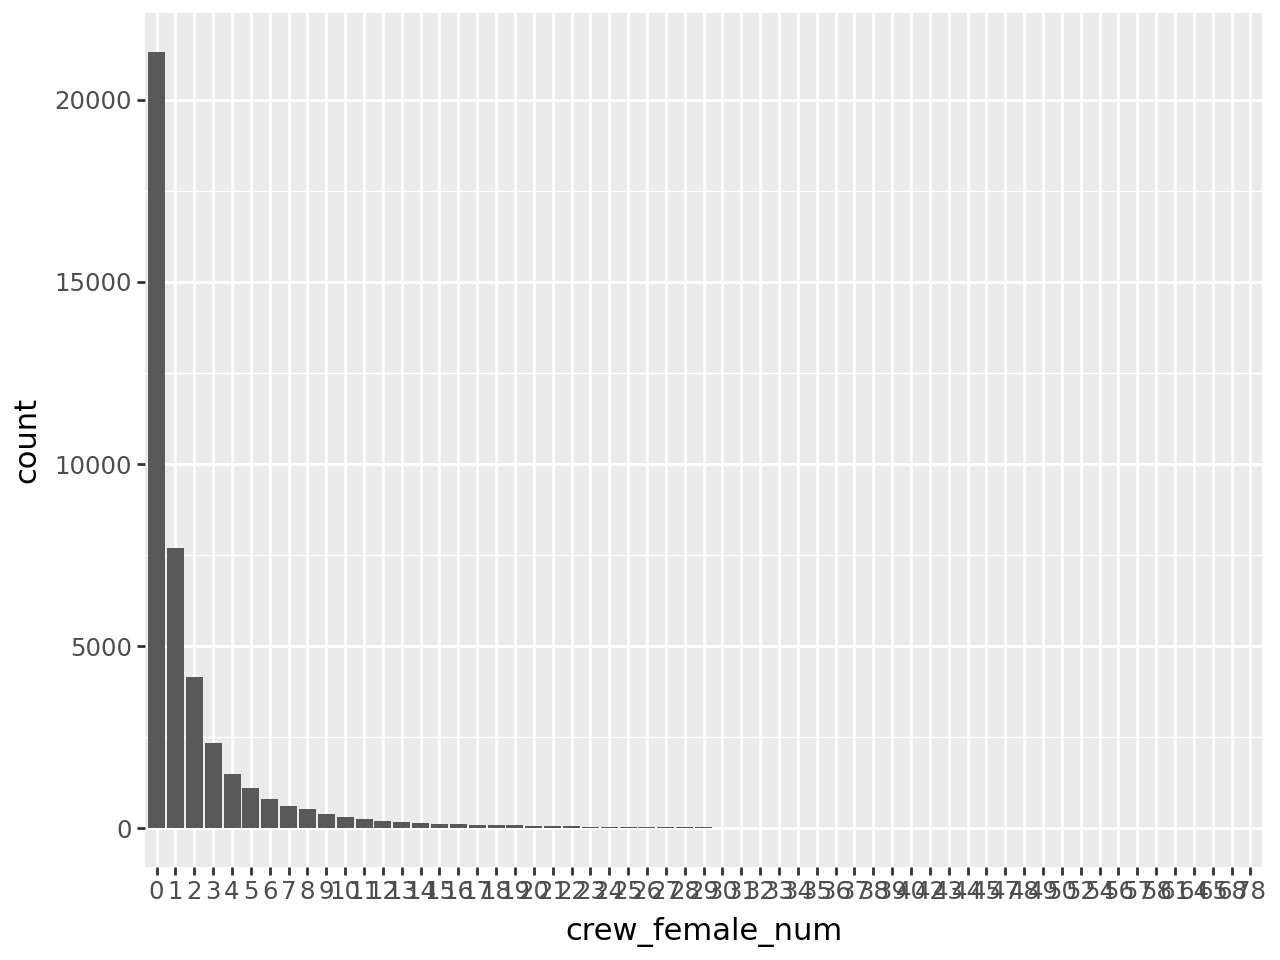

In [22]:
(ggplot(df_new,
        aes(x="crew_female_num")) + 
    geom_bar()
)

In [23]:
ratio_df = pd.DataFrame()
ratio_df['cast_female_ratio'] = df_new['cast_female_num'] / df_new['cast_total_num']
ratio_df['crew_female_ratio'] = df_new['crew_female_num'] / df_new['crew_total_num']
ratio_df['directing_female_ratio'] = df_new['Directing_female'] / df_new['Directing_total']
ratio_df['writing_female_ratio'] = df_new['Writing_female'] / df_new['Writing_total']
ratio_df['production_female_ratio'] = df_new['Production_female'] / df_new['Production_total']
ratio_df

,cast_female_ratio,crew_female_ratio,directing_female_ratio,writing_female_ratio,production_female_ratio
0,0.230769,0.254717,0.333333,NaN,0.666667
1,0.461538,0.125,NaN,NaN,0.166667
2,0.428571,0.0,NaN,NaN,NaN
3,0.4,0.2,NaN,NaN,0.4
4,0.416667,0.285714,NaN,0.5,1.0
...,...,...,...,...,...
42703,0.2,0.222222,NaN,NaN,1.0
42704,0.666667,0.111111,NaN,NaN,NaN
42705,0.363636,0.0,NaN,NaN,NaN
42706,0.133333,0.0,NaN,NaN,NaN


In [24]:
ratio_df.isna().sum()

cast_female_ratio              0
crew_female_ratio              0
directing_female_ratio     35957
writing_female_ratio       35294
production_female_ratio    31617
dtype: int64

In [ ]:
## Well, this is very disappointing. There are so many nan's in sub-categories of crew members, meaning that female_num = 0 and total_num = 0. So the nan's doesn't give us much information either.

In [25]:
ratio_df_no_nan = ratio_df.dropna().reset_index(drop=True)
ratio_df_no_nan

,cast_female_ratio,crew_female_ratio,directing_female_ratio,writing_female_ratio,production_female_ratio
0,0.491228,0.301887,0.5,0.5,0.333333
1,0.625,0.25,0.142857,0.25,0.428571
2,0.215385,0.18543,0.25,0.5,0.375
3,0.309524,0.2,0.25,0.333333,0.266667
4,0.5,0.545455,1.0,1.0,0.333333
...,...,...,...,...,...
1321,0.428571,0.478261,1.0,1.0,0.333333
1322,0.444444,0.6,1.0,1.0,0.333333
1323,0.583333,0.3,0.5,0.333333,0.5
1324,0.222222,0.25,1.0,0.5,0.333333


In [26]:
ratio_df_no_nan.describe().T

,count,unique,top,freq
cast_female_ratio,1326.0,251.0,0.5,123.0
crew_female_ratio,1326.0,361.0,0.5,90.0
directing_female_ratio,1326.0,28.0,1.0,681.0
writing_female_ratio,1326.0,28.0,1.0,621.0
production_female_ratio,1326.0,92.0,0.5,232.0


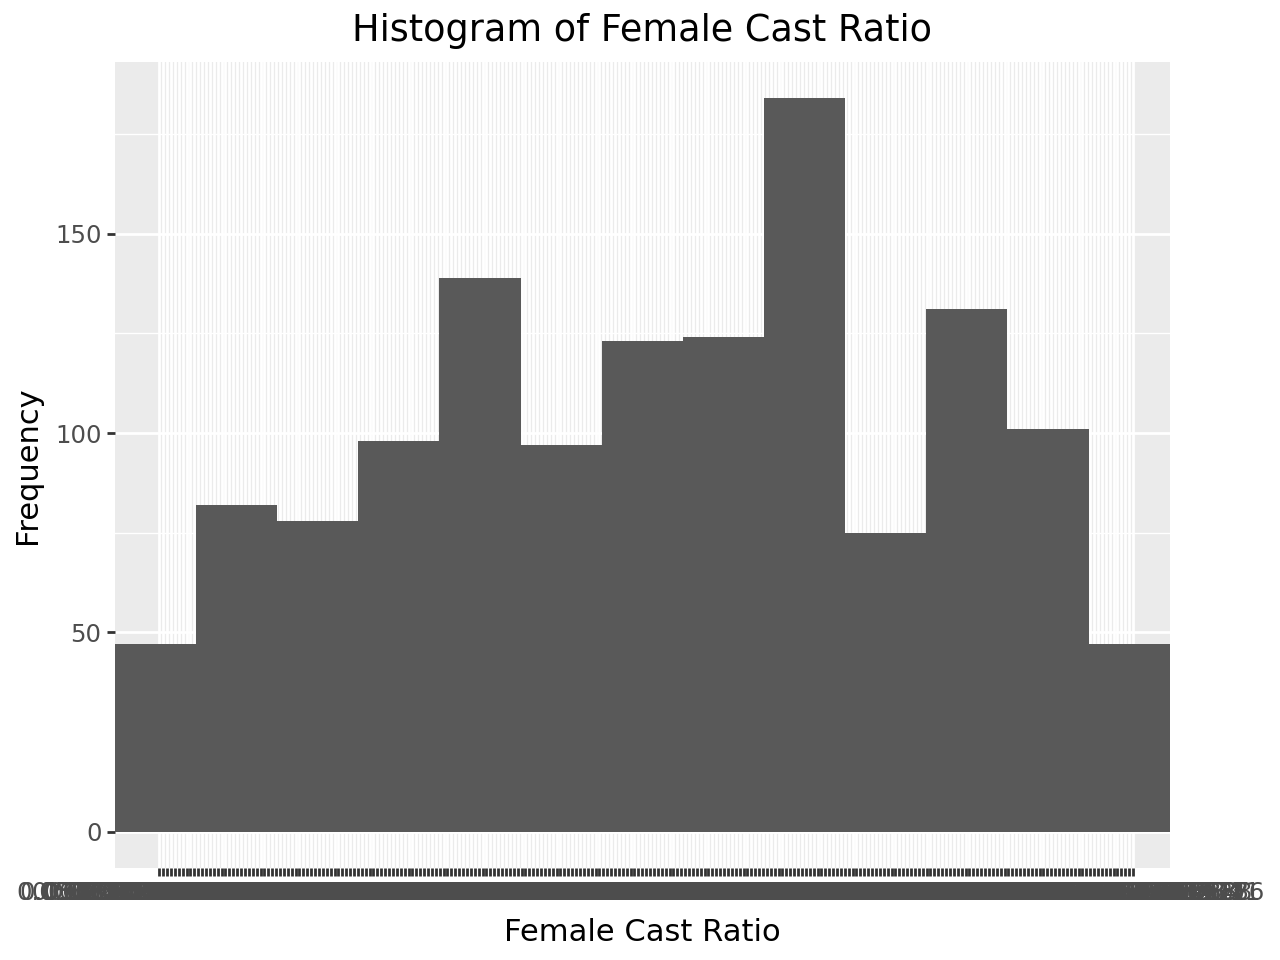

In [49]:
(ggplot(ratio_df_no_nan,
        aes(x="cast_female_ratio")) + 
    geom_histogram(bins=13) + 
    labs(
        title = 'Histogram of Female Cast Ratio',
        x = 'Female Cast Ratio',
        y = 'Frequency'
    )
)

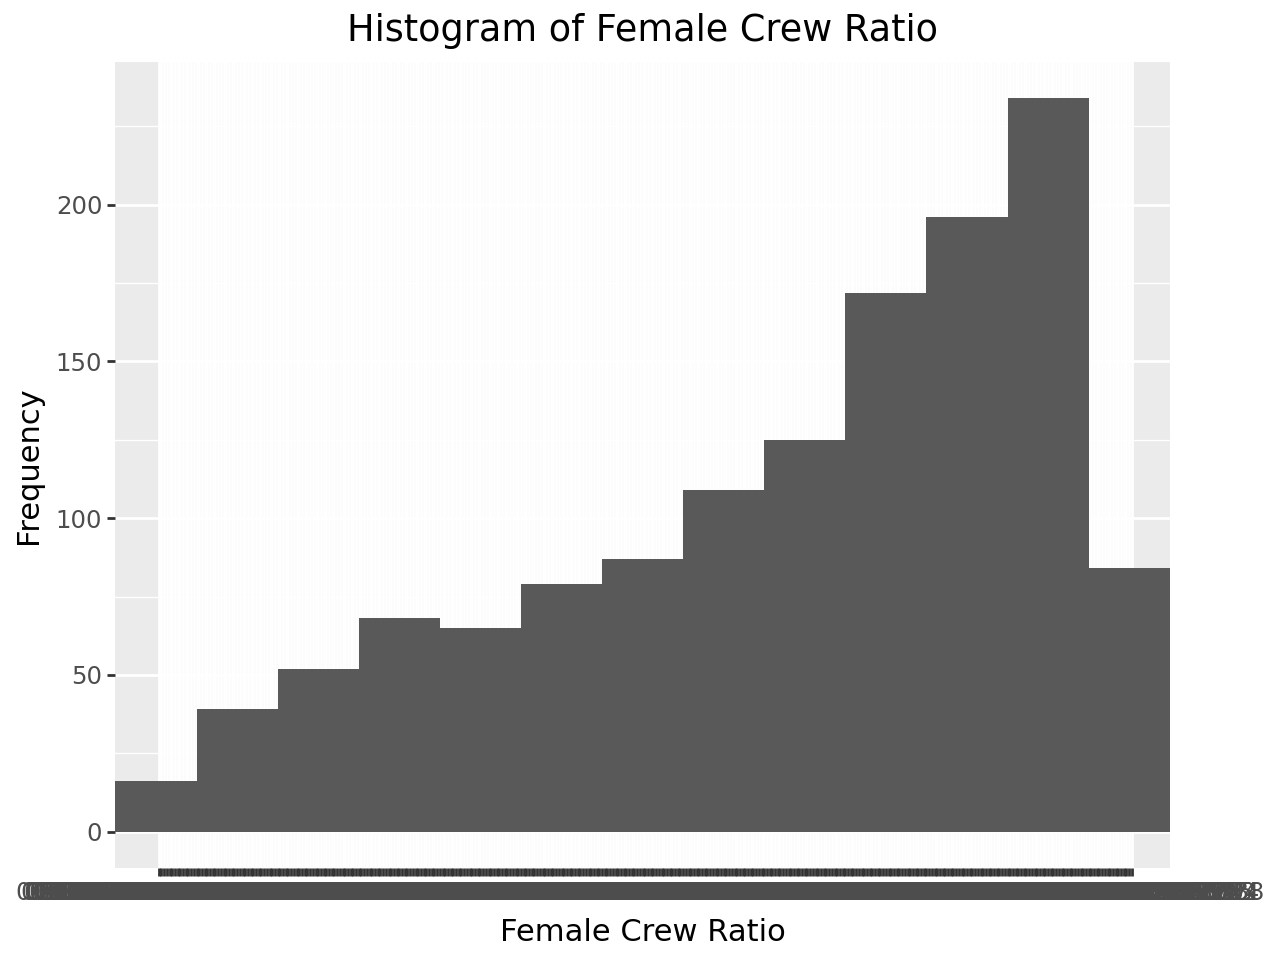

In [48]:
(ggplot(ratio_df_no_nan,
        aes(x="crew_female_ratio")) + 
    geom_histogram(bins=13) + 
    labs(
        title = 'Histogram of Female Crew Ratio',
        x = 'Female Crew Ratio',
        y = 'Frequency'
    )
)

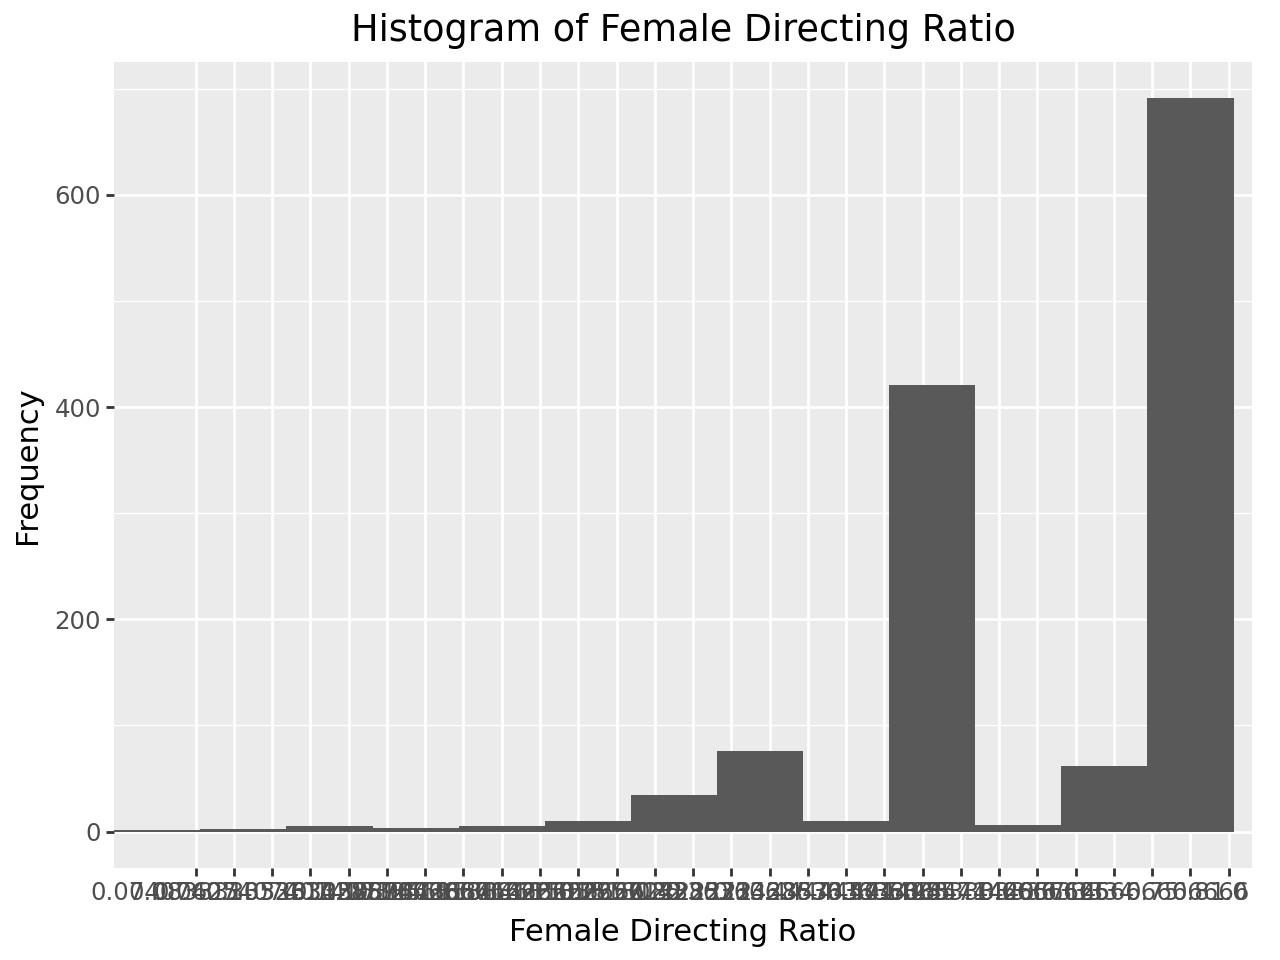

In [47]:
(ggplot(ratio_df_no_nan,
        aes(x="directing_female_ratio")) + 
    geom_histogram(bins=13) + 
    labs(
        title = 'Histogram of Female Directing Ratio',
        x = 'Female Directing Ratio',
        y = 'Frequency'
    )
)

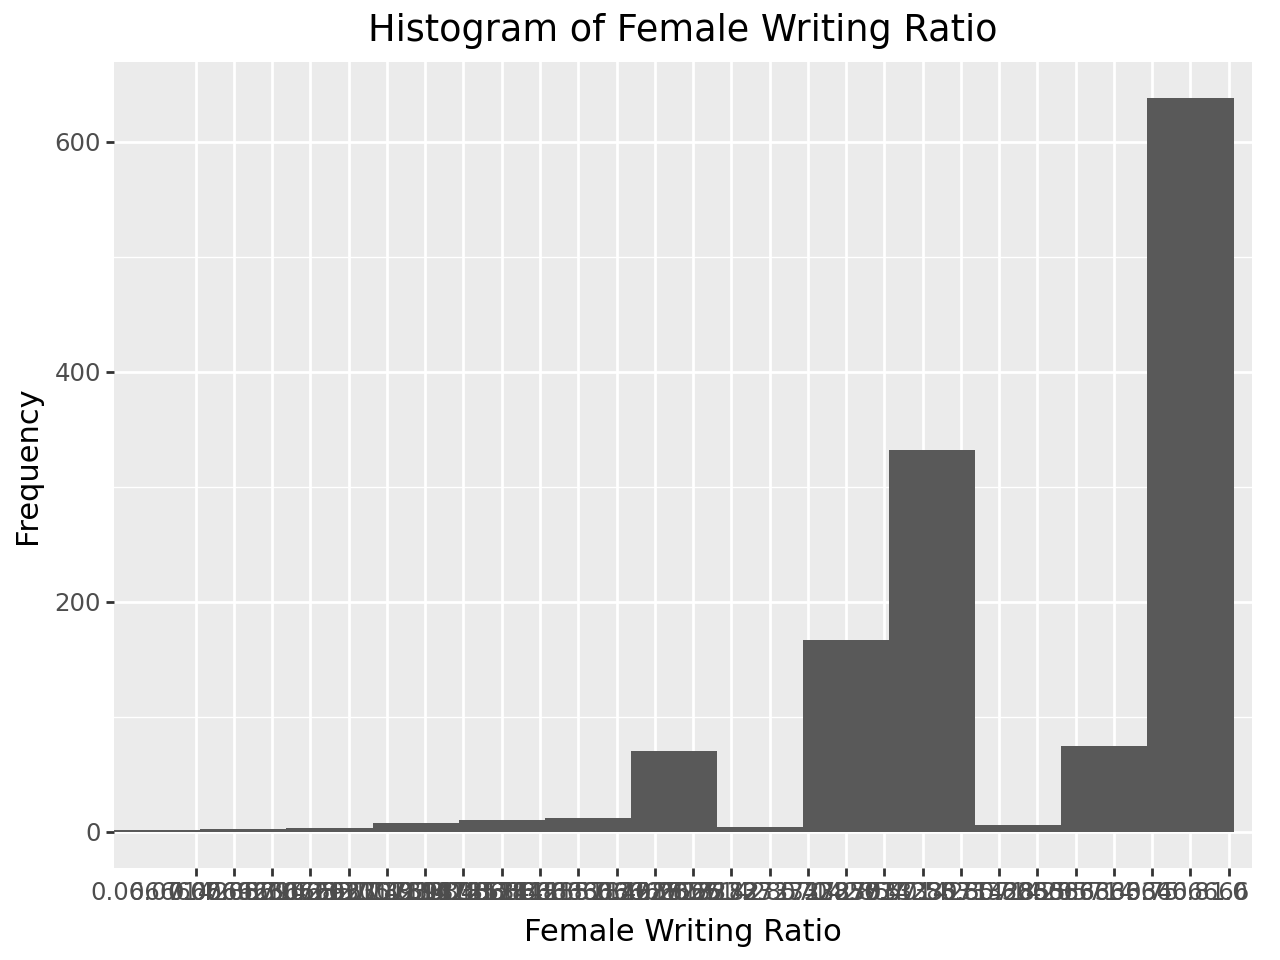

In [46]:
(ggplot(ratio_df_no_nan,
        aes(x="writing_female_ratio")) + 
    geom_histogram(bins=13) + 
    labs(
        title = 'Histogram of Female Writing Ratio',
        x = 'Female Writing Ratio',
        y = 'Frequency'
    )
)

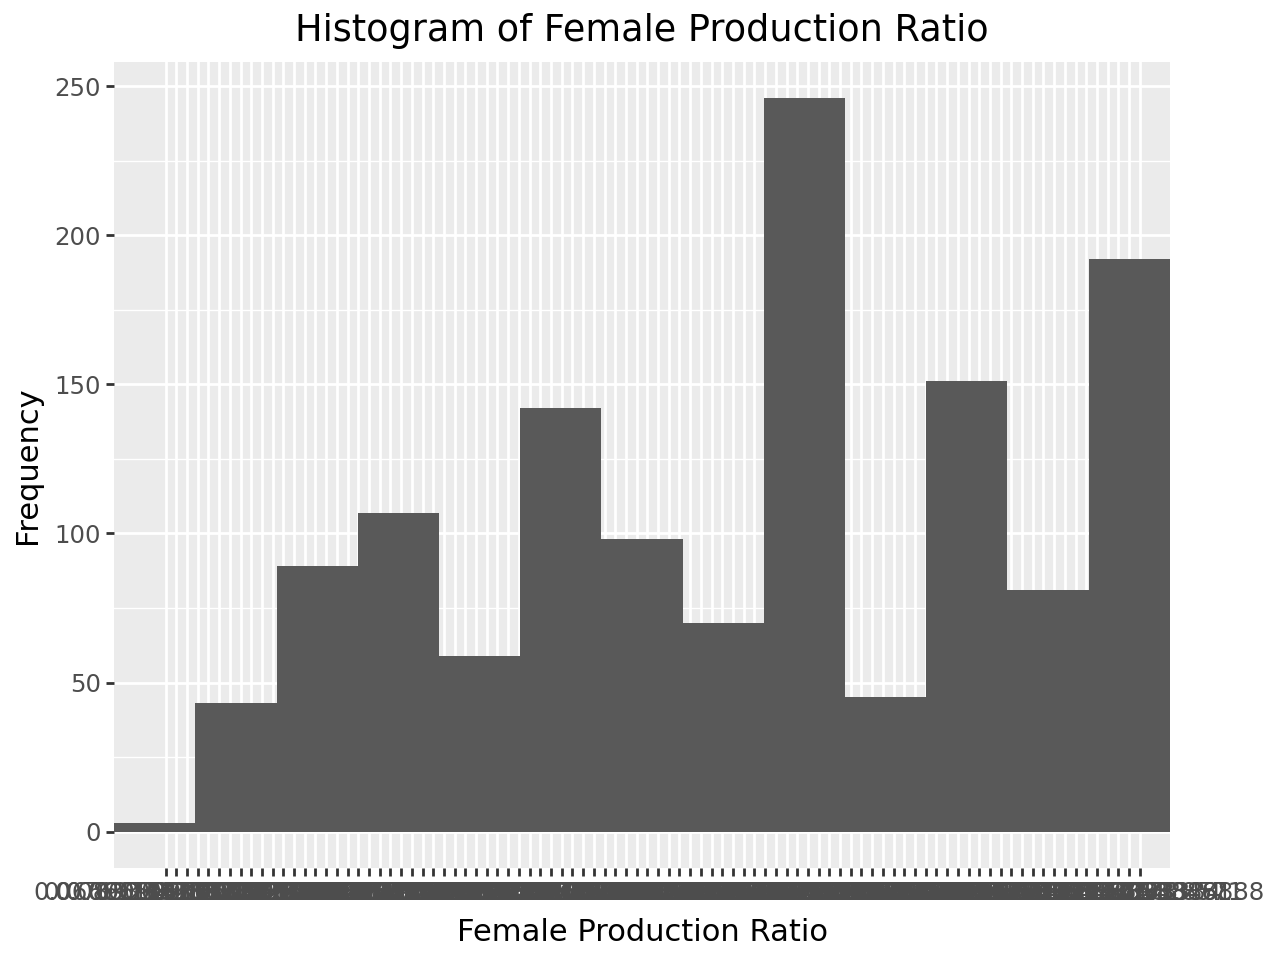

In [45]:
(ggplot(ratio_df_no_nan,
        aes(x="production_female_ratio")) + 
    geom_histogram(bins=13) + 
    labs(
        title = 'Histogram of Female Production Ratio',
        x = 'Female Production Ratio',
        y = 'Frequency'
    )
)